# **Classification Task**

---



**Details of Dataset:**

The Loan Approval Classification Dataset, sourced from Kaggle, contains 45,001 records and 14 columns related to loan applicants. The target variable is loan_status, a binary classification indicating whether a loan is Approved or Rejected.

Dataset link: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

Author: Ta-wei Lo

I choose this dataset because of following key features.
Key features include:

•	Numerical variables: applicant income, loan amount, loan term, credit history, interest rate

•	Categorical variables: gender, marital status, education level, employment status, property area

•	Target variable: loan_status


**Connection to Sustainable Development Goals (SDGs)**

This project aligns with:

•	SDG 1: No Poverty, by improving access to financial services and reducing biased loan rejections.

•	SDG 8: Decent Work and Economic Growth, by supporting fair credit distribution and financial inclusion for individuals and small businesses.


In [ ]:
# Classification Task

# EDA (Exploratory Data Analysis)
# Import required libraries for data handling
import pandas as pd
import numpy as np

# Load dataset for my classification task
df = pd.read_csv("/content/drive/MyDrive/Final Assessment AI/loan_data.csv")

# Display the first 5 rows of the dataset
# This helps in understanding the structure and sample values
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
# Display dataset information such as:
# - Number of rows and columns
# - Data types of each column
# - Presence of missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# Check for missing values in each column
df.isnull().sum()


,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
# Generate summary statistics for numerical features
# Includes mean, standard deviation, min, max, and quartiles
df.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# Data Cleaning
# Check number of rows and columns
df.shape

(45000, 14)

In [ ]:
# Inspect data types of all columns
df.dtypes


,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Remove duplicates if found.
df = df.drop_duplicates()
# There is not duplicate data if there was any it would have remove the data

In [ ]:
# Standardize text columns (lowercase and strip spaces)
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()


In [ ]:
# Summary statistics after cleaning
df.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


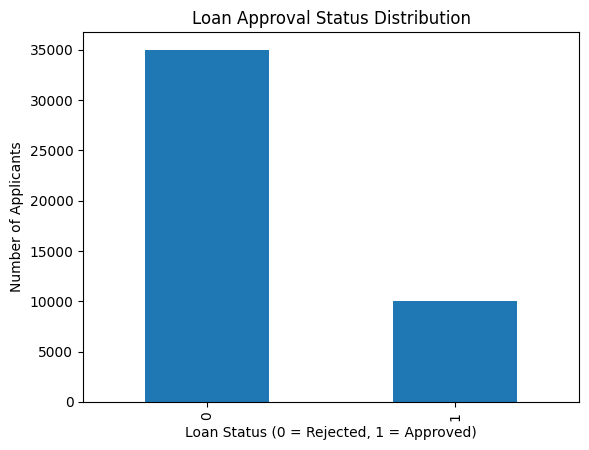

In [ ]:
# Visualization and charts to summarize, explore, and understand the data.
# Visualize the distribution of loan approval status
# This helps identify whether the dataset is balanced or imbalanced
df['loan_status'].value_counts().plot(kind='bar')

plt.title("Loan Approval Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Number of Applicants")
plt.show()


Above graph shows the Distribution of Loan Approval Status and we can see that maximum number of people have not been approved for loan.


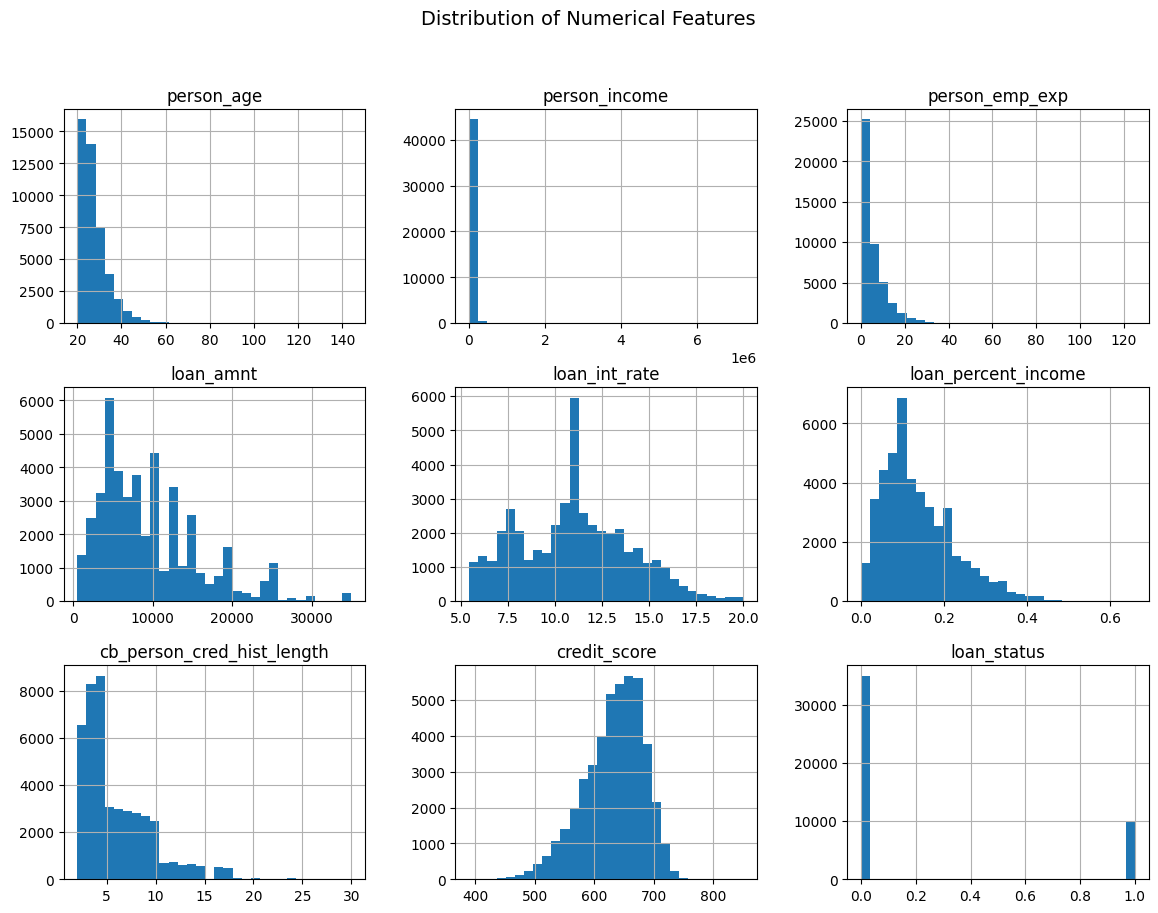

In [ ]:
# Select numerical features
numerical_features = df.select_dtypes(include='number')

# Plot histograms
numerical_features.hist(bins=30, figsize=(14,10))

plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


The above graphs shows us distribution of Numerical features.


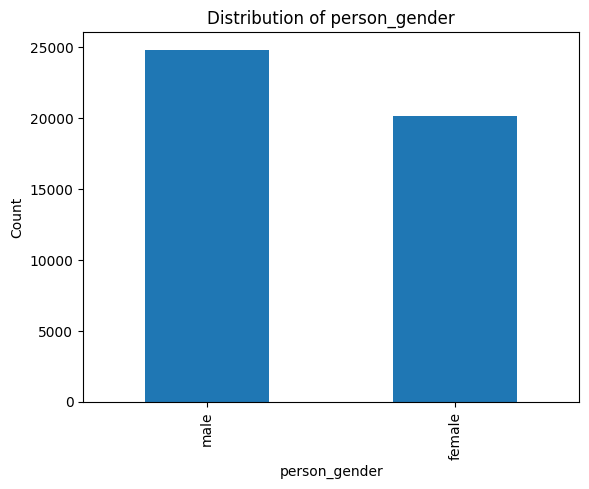

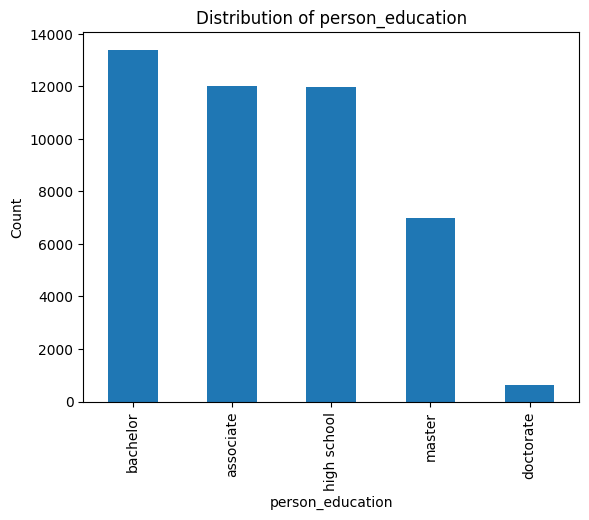

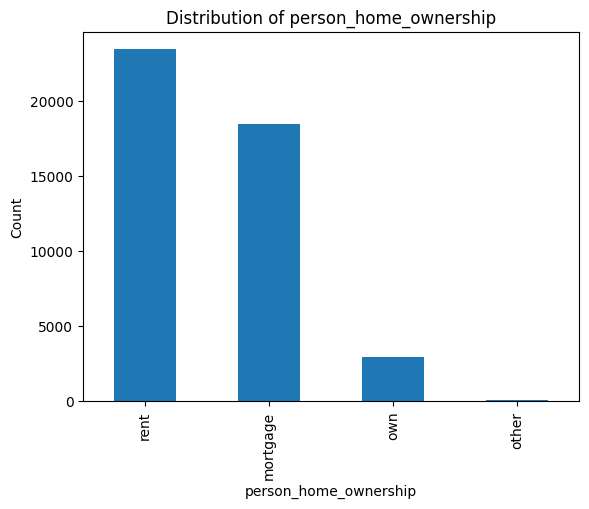

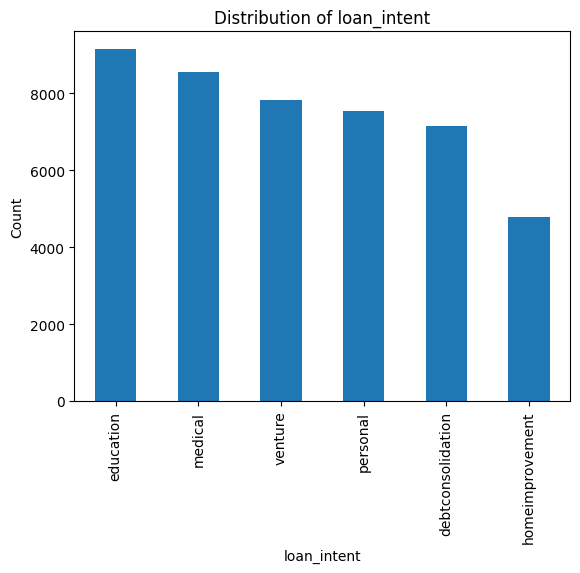

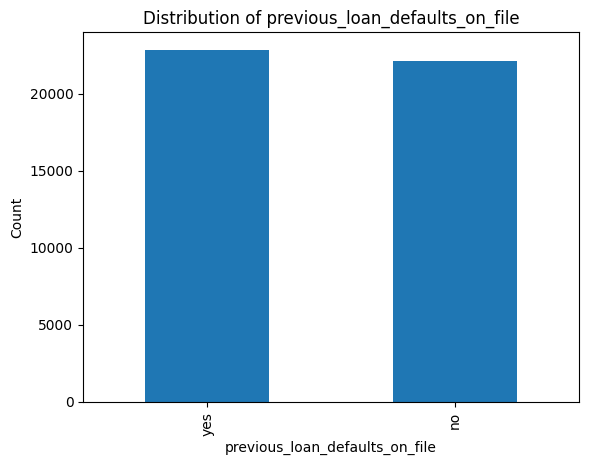

In [ ]:
# Select categorical features
categorical_features = df.select_dtypes(include='object')

# Plot distributions
for col in categorical_features.columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


The above graph shows the distribution of categorical features.


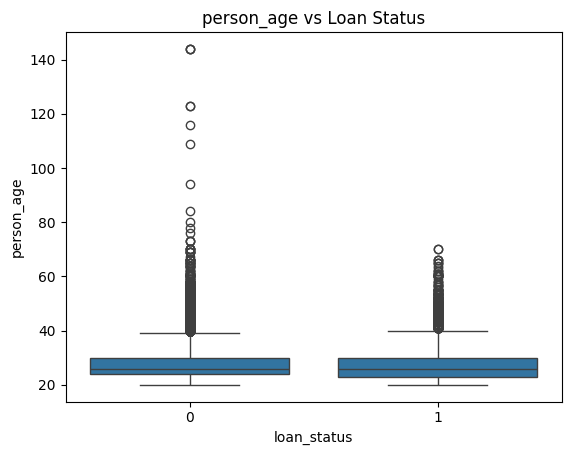

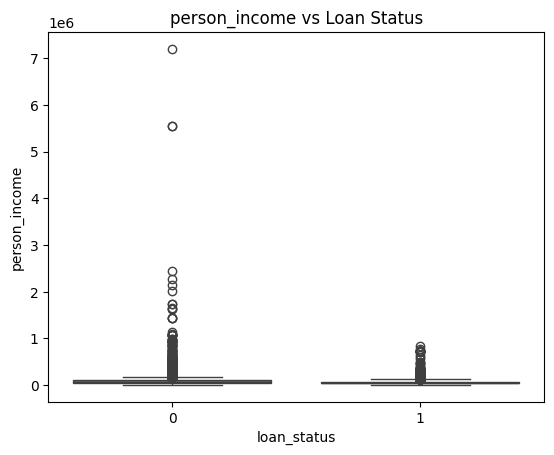

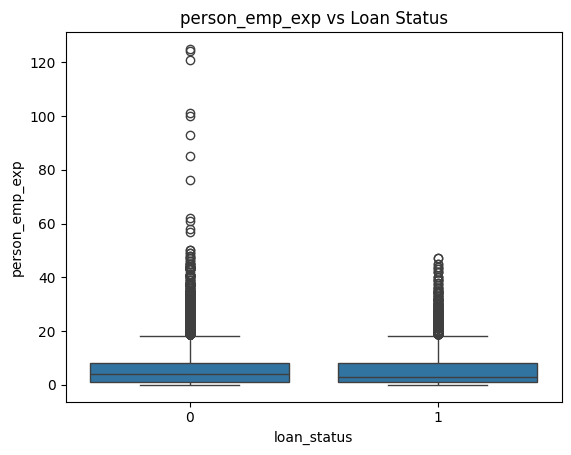

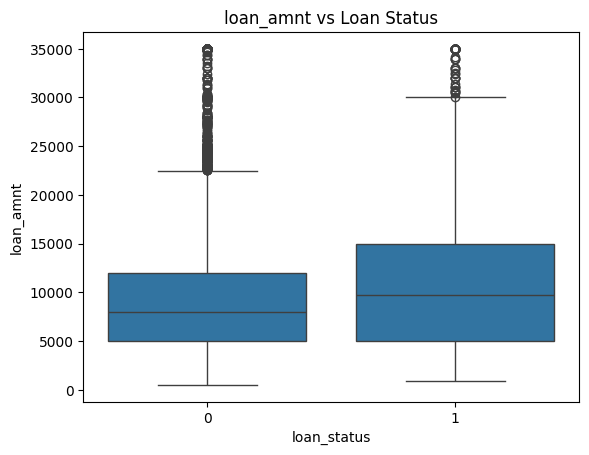

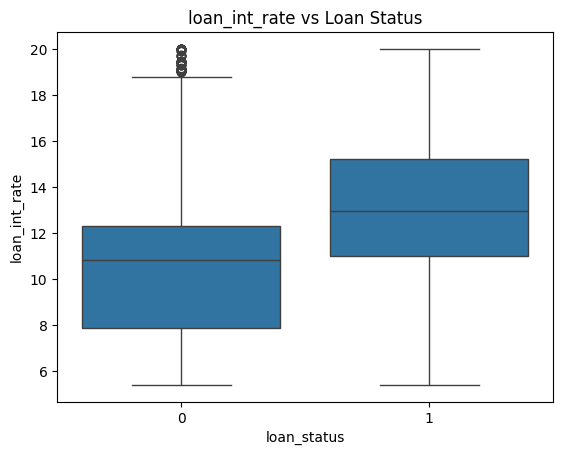

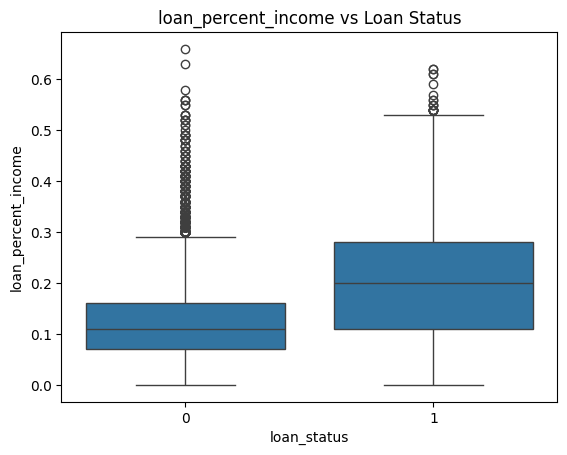

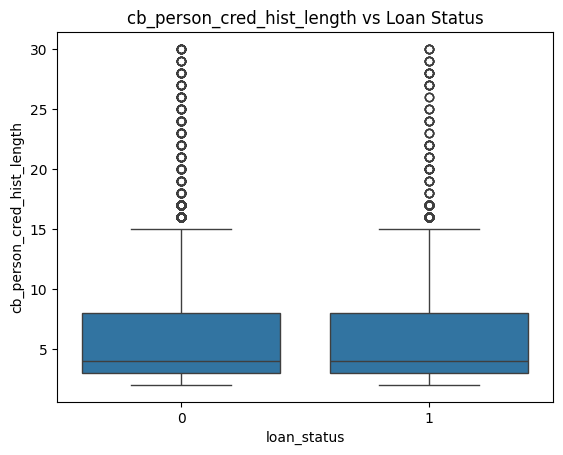

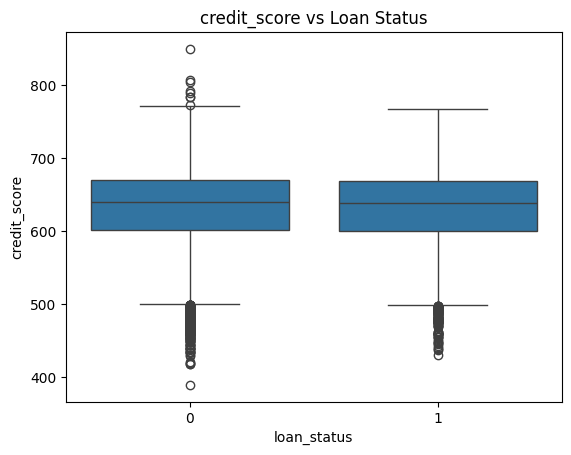

In [ ]:
# Compare numerical variables with loan approval
for col in numerical_features.columns:
    if col != 'loan_status':
        sns.boxplot(x='loan_status', y=col, data=df)
        plt.title(f"{col} vs Loan Status")
        plt.show()


The above graphs show the loan approval statu on numerical features

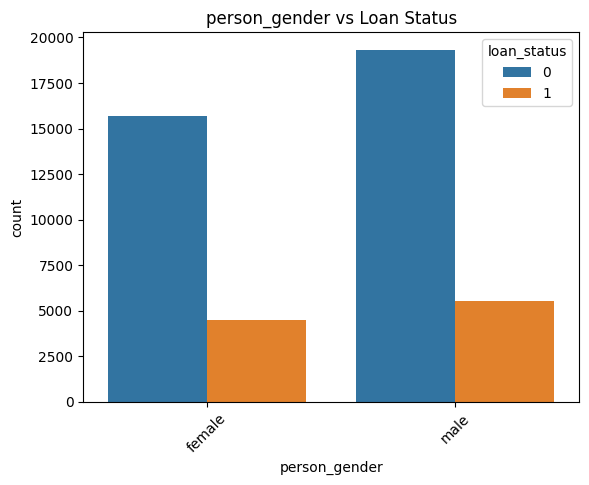

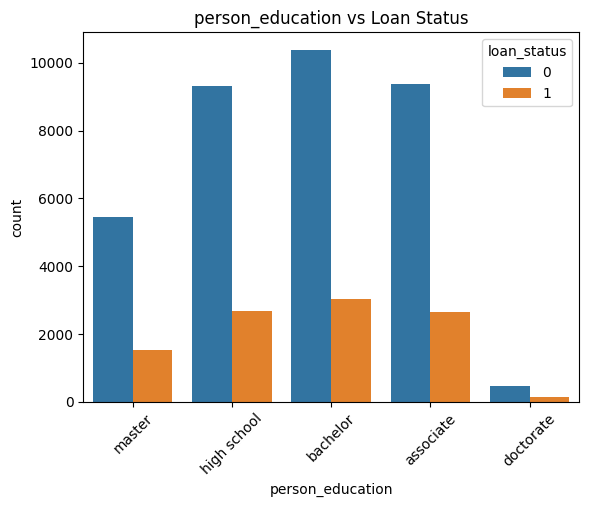

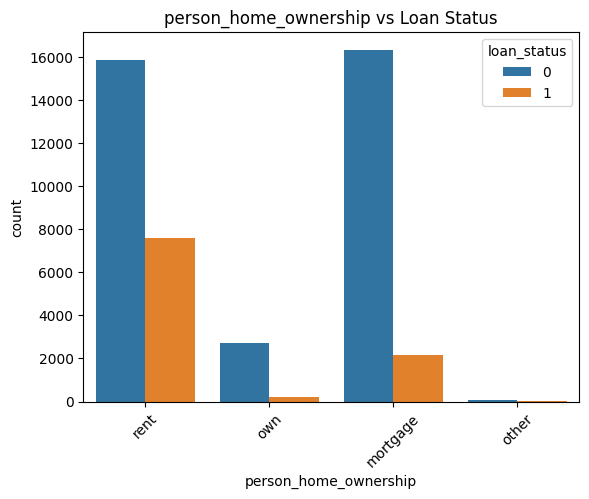

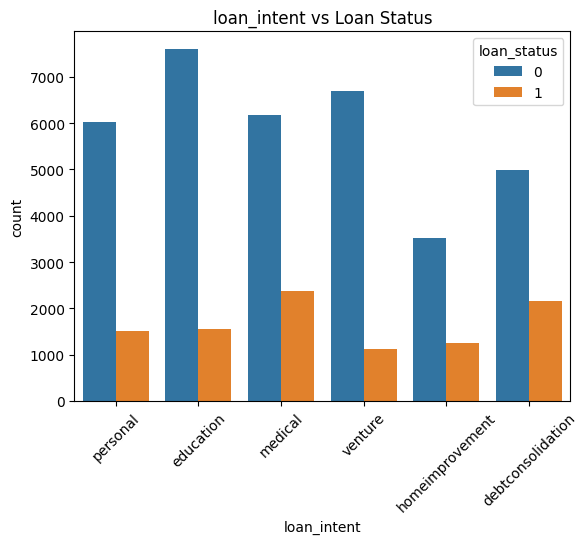

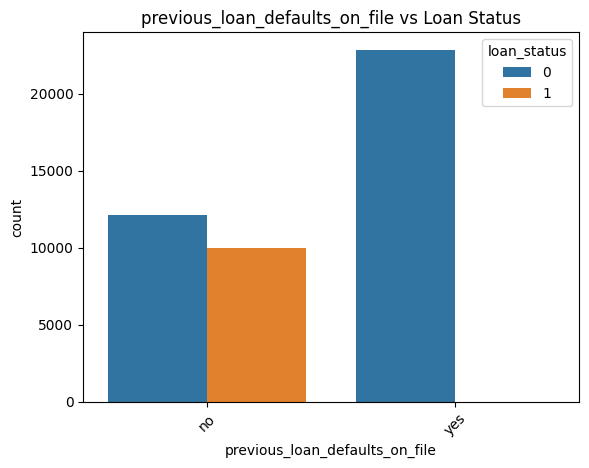

In [ ]:
# Compare categorical variables with loan status
for col in categorical_features.columns:
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=45)
    plt.show()


The above graphs show the loan approval status on categorical feature.

In [ ]:
# Task 2 - Building a neural network model


In [ ]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# I'am useing scikit-learn’s MLPClassifier, since it’s suitable for tabular classification problems like your loan approval dataset.


In [ ]:
# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include='object').columns

# Initialize encoder
le = LabelEncoder()

# Apply encoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Neural networks only work with numerical input, so all categorical features must be converted.

# LabelEncoder transforms categories into integers (e.g., "male" → 1, "female" → 0).

In [ ]:
# Features (all columns except target)
X = df.drop('loan_status', axis=1)

# Target variable
y = df['loan_status']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# stratify=y ensures loan approval ratio is preserved in train/test sets.
# Typical 80-20 split is standard for small-to-medium datasets.


In [ ]:
# Neural networks perform better when features are scaled
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# StandardScaler standardizes features to mean=0, std=1.
# Prevents features with large ranges (e.g., income) from dominating learning.

In [ ]:
# Initialize MLPClassifier
# Architecture: 2 hidden layers, 32 neurons each, ReLU activation
# Solver: Adam optimizer, max 500 iterations
mlp = MLPClassifier(hidden_layer_sizes=(32,32),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    random_state=42)

# Train the model on scaled training data
mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=500, random_state=42)

**Explanation:**

Hidden layers & neurons: 2 layers × 32 neurons (common starting architecture)

Activation: ReLU (good for hidden layers)

Solver: Adam (adaptive optimizer for faster convergence)

Iterations: 500 ensures model can converge

1. Loss Function

For binary classification, MLPClassifier internally uses log loss (also called cross-entropy loss).

This measures the difference between the predicted probabilities and the actual labels.

Formula (binary cross-entropy):

Loss = −1/𝑁∑𝑖=1𝑁[𝑦𝑖⋅log⁡(𝑦^𝑖)+(1−𝑦𝑖)⋅log⁡(1−𝑦^𝑖)]

2. Optimization Algorithm

We used Adam optimizer (solver='adam').

Adam is an adaptive optimizer that updates learning rates for each weight individually and is well-suited for tabular data.

In [ ]:
# Predict on both training and test data
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

# Compute metrics for TRAINING set
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Compute metrics for TEST set
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Performance on TRAINING Set:")
print(f"Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}\n")

print("Performance on TEST Set:")
print(f"Accuracy: {test_acc:.4f}, Precision: {test_prec:.4f}, Recall: {test_rec:.4f}, F1: {test_f1:.4f}")


Performance on TRAINING Set:
Accuracy: 0.9285, Precision: 0.8746, Recall: 0.7916, F1: 0.8310

Performance on TEST Set:
Accuracy: 0.9119, Precision: 0.8314, Recall: 0.7570, F1: 0.7925


In [ ]:
# Task - 3 Building a Primary Model (Two Classical ML Models):

I have choosen two models **Logistic Regression** and **Random Forest Classifier **for the following task because:

Logistic Regression: Standard for binary Classification

Random Forest Classifier: ensemble tree-based method that usually performs better on tabular datasets

In [ ]:
# Features and target (already defined while doing neural network task)
# X_train, X_test, y_train, y_test

# Optional: print shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (36000, 13)
Test set shape: (9000, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model 1: Logistic Regression

logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_scaled, y_train)  # use scaled features like NN


LogisticRegression(max_iter=500, random_state=42)

In [ ]:

# Model 2: Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random Forest can handle unscaled data

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1-Score': f1_score(y_train, y_train_pred)
    }

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-Score': f1_score(y_test, y_test_pred)
    }

    print(f"\n{model_name} Performance on Training Set:", train_metrics)
    print(f"{model_name} Performance on Test Set:", test_metrics)

    return train_metrics, test_metrics

# Evaluate Logistic Regression
log_train, log_test = evaluate_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")

# Evaluate Random Forest
rf_train, rf_test = evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")



Logistic Regression Performance on Training Set: {'Accuracy': 0.8897222222222222, 'Precision': 0.7617563003377501, 'Recall': 0.733, 'F1-Score': 0.7471015415976557}
Logistic Regression Performance on Test Set: {'Accuracy': 0.8967777777777778, 'Precision': 0.777893098079917, 'Recall': 0.7495, 'F1-Score': 0.763432645785587}

Random Forest Performance on Training Set: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
Random Forest Performance on Test Set: {'Accuracy': 0.9276666666666666, 'Precision': 0.8878665899942496, 'Recall': 0.772, 'F1-Score': 0.8258892752072746}


| Model               | Train Accuracy | Test Accuracy | Test F1-Score | Comment                                                       |
| ------------------- | -------------- | ------------- | ------------- | ------------------------------------------------------------- |
| Logistic Regression | 0.8897         | 0.8968        | 0.7634        | Generalizes well, simple, interpretable                       |
| Random Forest       | 1.0            | 0.9277        | 0.8259        | Slight overfitting, better accuracy & F1-score, more powerful |


**Conclusion:**

Random Forest is the better model because it has higher test accuracy and F1-score, which is usually the most important metric for classification.

Logistic Regression is simpler and interpretable, so it’s a good baseline.

We should note Random Forest overfits slightly, but the performance on the test set is still excellent.

In [ ]:
# Task 4 – Hyperparameter Optimization with Cross-Validation for Logistic Regression and Random Forest

Identify Hyperparameters

Logistic Regression (sklearn)
Key hyperparameters to tune:

C → inverse of regularization strength (higher = less regularization)

penalty → type of regularization (l1, l2, elasticnet, none)

solver → optimization algorithm (liblinear, saga, lbfgs etc.)

Random Forest (sklearn)
Key hyperparameters to tune:

n_estimators → number of trees

max_depth → max depth of trees

min_samples_split → min samples to split a node

min_samples_leaf → min samples in a leaf node

max_features → number of features to consider at each split

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],   # use 'l2' with solver='lbfgs' for simplicity
    'solver': ['lbfgs']
}

logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=500, random_state=42),
    param_grid=logreg_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # optimize for F1-score
    n_jobs=-1
)

logreg_grid.fit(X_train_scaled, y_train)

print("Best Logistic Regression Hyperparameters:", logreg_grid.best_params_)
print("Best CV F1-Score:", logreg_grid.best_score_)


Best Logistic Regression Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV F1-Score: 0.7458644098728715


In [ ]:

# Random Forest Hyperparameter Tuning

rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1',  # optimize F1-score
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Hyperparameters:", rf_grid.best_params_)
print("Best CV F1-Score:", rf_grid.best_score_)

Best Random Forest Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV F1-Score: 0.8203058980513663


| Model               | Best Hyperparameters                                                                                          | Best CV F1-Score |
| ------------------- | ------------------------------------------------------------------------------------------------------------- | ---------------- |
| Logistic Regression | `{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}`                                                              | 0.746            |
| Random Forest       | `{'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, min_samples_leaf: 1, max_features: 'sqrt'}` | 0.820            |


In [ ]:
# Task 5 – Feature Selection for classification task

In [ ]:
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np

# Feature Selection for Logistic Regression using RFE

# Use logistic regression with best hyperparameters
logreg_for_rfe = LogisticRegression(
    C=100,
    penalty='l2',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)

# RFE: select top 8 features
rfe = RFE(estimator=logreg_for_rfe, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

# Get selected features
logreg_selected_features = X_train.columns[rfe.support_].tolist()
print("Selected features for Logistic Regression:", logreg_selected_features)



Selected features for Logistic Regression: ['person_age', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'credit_score', 'previous_loan_defaults_on_file']


In [ ]:

# Feature Selection for Random Forest using Feature Importance

# Train Random Forest with best hyperparameters
rf_for_fs = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
rf_for_fs.fit(X_train, y_train)

# Get feature importances
importances = rf_for_fs.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select features with importance above the mean
mean_importance = importances.mean()
rf_selected_features = feature_importance_df[feature_importance_df['Importance'] > mean_importance]['Feature'].tolist()
print("Selected features for Random Forest:", rf_selected_features)


Selected features for Random Forest: ['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate', 'person_income']


| Model               | Feature Selection Method  | Selected Features                                                                                                                             |
| ------------------- | ------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| Logistic Regression | RFE (n=8)                 | `person_age, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, credit_score, previous_loan_defaults_on_file` |
| Random Forest       | Feature Importance > Mean | `previous_loan_defaults_on_file, loan_percent_income, loan_int_rate, person_income`                                                           |


In [ ]:
# Task - 6 Final Models and Comparative Analysis?

In [ ]:
# Selected features
logreg_features = ['person_age', 'person_home_ownership', 'loan_amnt', 'loan_intent',
                   'loan_int_rate', 'loan_percent_income', 'credit_score', 'previous_loan_defaults_on_file']

rf_features = ['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate', 'person_income']

# For simplicity, let's take union of both for final comparison
final_features = list(set(logreg_features + rf_features))

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Scale features for Neural Network and Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler_final = StandardScaler()
X_train_scaled_final = scaler_final.fit_transform(X_train_final)
X_test_scaled_final = scaler_final.transform(X_test_final)


In [ ]:
# Logistic Regression
logreg_final = LogisticRegression(
    C=100, penalty='l2', solver='lbfgs', max_iter=500, random_state=42
)
logreg_final.fit(X_train_scaled_final, y_train)

# Random Forest
rf_final = RandomForestClassifier(
    n_estimators=100, max_depth=None, min_samples_split=2,
    min_samples_leaf=1, max_features='sqrt', random_state=42
)
rf_final.fit(X_train_final, y_train)

# Neural Network (MLP Classifier)
from sklearn.neural_network import MLPClassifier
nn_final = MLPClassifier(
    hidden_layer_sizes=(16, 8), activation='relu', solver='adam',
    max_iter=500, random_state=42
)
nn_final.fit(X_train_scaled_final, y_train)


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y, scaled=False):
    if scaled:
        X_input = X
    else:
        X_input = X
    y_pred = model.predict(X_input)
    return {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    }

# Evaluate all models
logreg_metrics = evaluate_model(logreg_final, X_test_scaled_final, y_test, scaled=True)
rf_metrics = evaluate_model(rf_final, X_test_final, y_test)
nn_metrics = evaluate_model(nn_final, X_test_scaled_final, y_test, scaled=True)

print("Logistic Regression Test Metrics:", logreg_metrics)
print("Random Forest Test Metrics:", rf_metrics)
print("Neural Network Test Metrics:", nn_metrics)


Logistic Regression Test Metrics: {'Accuracy': 0.8976666666666666, 'Precision': 0.7793889176592439, 'Recall': 0.7525, 'F1-Score': 0.7657084711269397}
Random Forest Test Metrics: {'Accuracy': 0.9305555555555556, 'Precision': 0.88907753254103, 'Recall': 0.7855, 'F1-Score': 0.8340854791611362}
Neural Network Test Metrics: {'Accuracy': 0.9195555555555556, 'Precision': 0.8411764705882353, 'Recall': 0.7865, 'F1-Score': 0.8129198966408269}


| Model                | Selected Features | Accuracy | Precision | Recall | F1-Score |
| -------------------- | ----------------- | -------- | --------- | ------ | -------- |
| Logistic Regression  | 8 (RFE)           | 0.898    | 0.779     | 0.753  | 0.766    |
| Random Forest        | 4 (Importance)    | 0.931    | 0.889     | 0.786  | 0.834    |
| Neural Network (MLP) | 10 (Union)        | 0.920    | 0.841     | 0.787  | 0.813    |


Random Forest achieved the highest accuracy (0.931) and F1-score (0.834), making it the best model overall.

Neural Network performed well, slightly below Random Forest, showing good generalization.

Logistic Regression performed decently but lags slightly in recall and F1-score, likely due to its linear nature.

Feature Selection Impact:

Logistic Regression benefits from more features to capture linear relationships.

Random Forest needs fewer features, focusing only on the most important financial predictors.

# **Regression Task**

---



Details of dataset:

The New York City Airbnb Open Data dataset, sourced from Kaggle, contains 48,896 records and 16 columns representing Airbnb listings across the five boroughs of New York City. The target variable for this regression task is price, a continuous numerical value representing the nightly rental cost.

Dataset link: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Author: Dgomonov

I choose this dataset because of following key features.

Key features include:
•	Numerical variables: price, minimum nights, number of reviews, reviews per month, availability_365, latitude, longitude

•	Categorical variables: neighbourhood_group, neighbourhood, room_type

•	Identifier variables: id, host_id, name, host_name

•	Date variable: last_review

**Connection to Sustainable Development Goals (SDGs)**

This project aligns with:

•	SDG 11: Sustainable Cities and Communities, by supporting fair and transparent housing markets and helping city planners understand short-term rental pricing impacts on urban housing.

•	SDG 8: Decent Work and Economic Growth, by enabling hosts to price listings competitively and sustainably while promoting responsible tourism.


In [27]:
# Regression Task EDA - Airbnb NYC


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df_reg = pd.read_csv("/content/drive/MyDrive/Final Assessment AI/AB_NYC_2019.csv")


In [28]:
# 2. Quick overview
print("First 5 rows:")
print(df_reg.head())

print("\nDataset Info:")
print(df_reg.info())

print("\nSummary Statistics (Numeric Features):")
print(df_reg.describe())

First 5 rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1         

In [29]:
# 3. Handle missing values
# 'reviews_per_month' has NaN, fill with 0
df_reg['reviews_per_month'].fillna(0, inplace=True)

# Optional: drop columns not needed for regression
df_reg.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df_reg.isnull().sum())


Missing values after cleaning:
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


/tmp/ipython-input-1709484479.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reg['reviews_per_month'].fillna(0, inplace=True)


In [30]:
# 4. Basic distributions
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                    'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

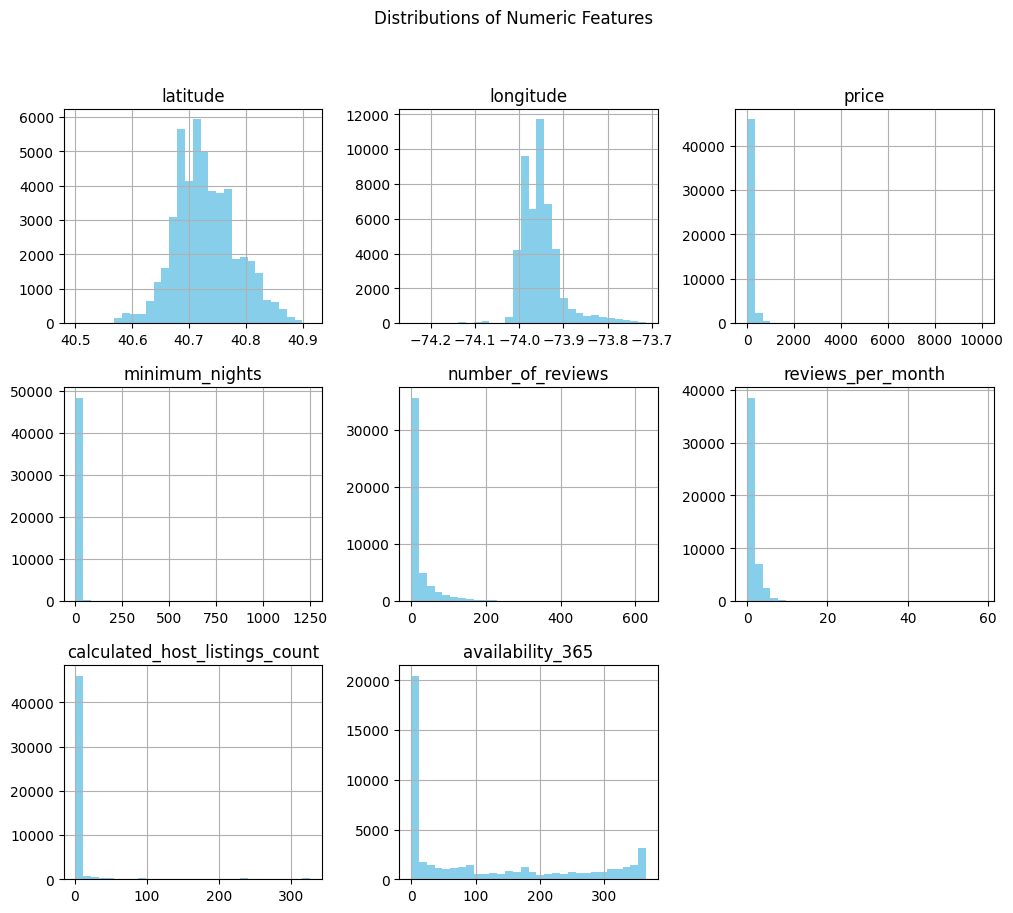

/tmp/ipython-input-2001508171.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reg, x='neighbourhood_group', palette='Set2')


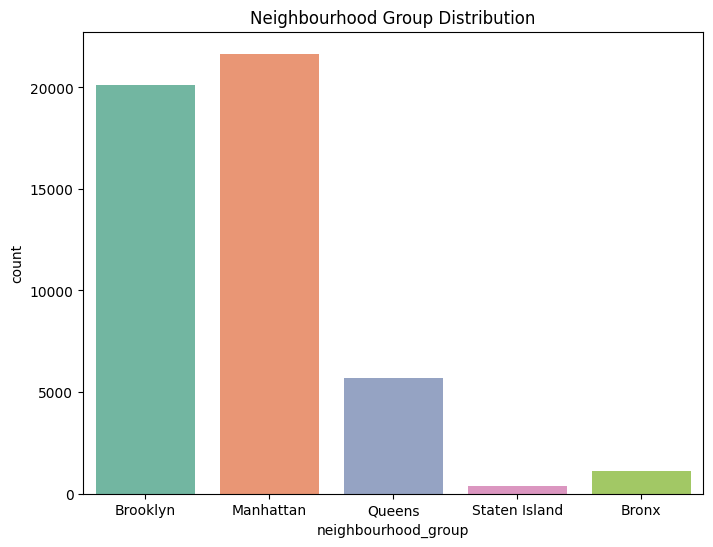

/tmp/ipython-input-2001508171.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reg, x='room_type', palette='Set3')


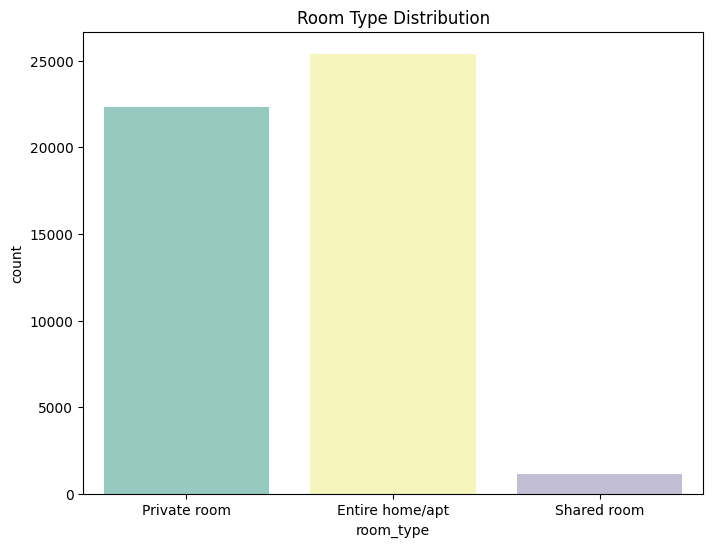

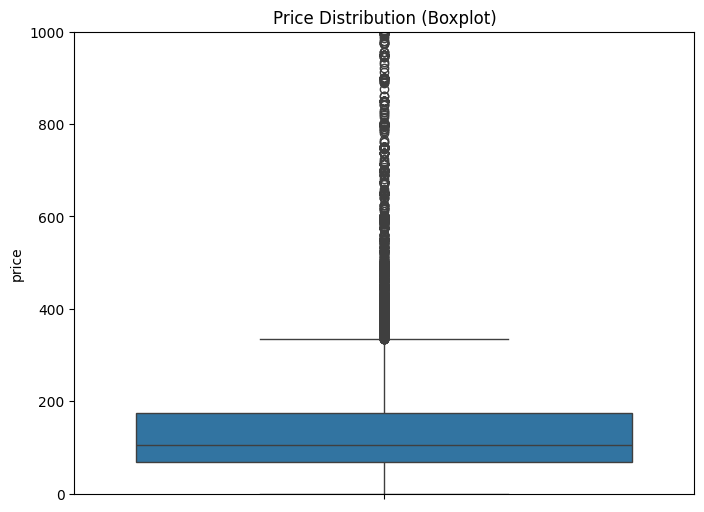

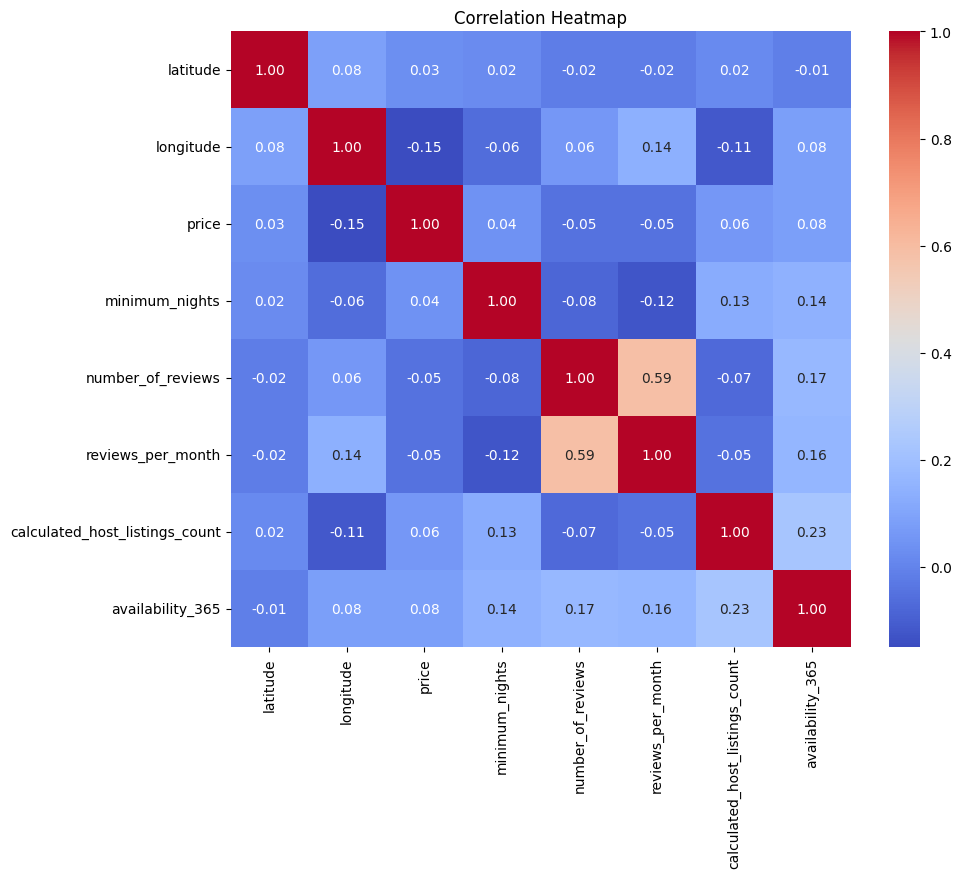

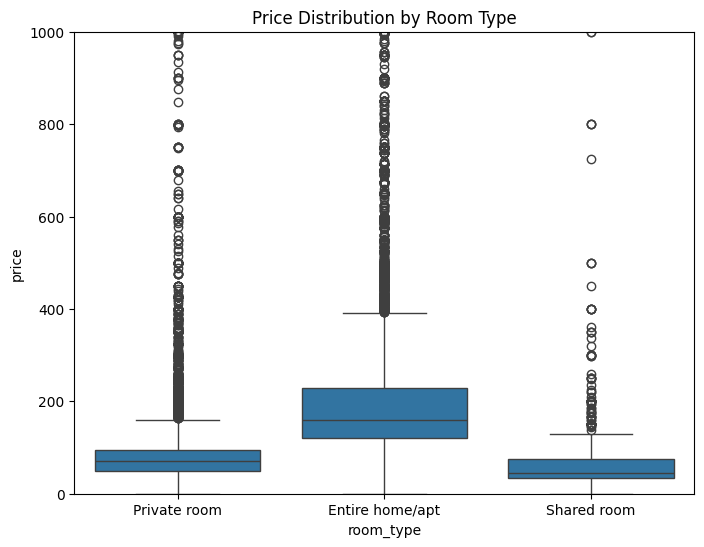

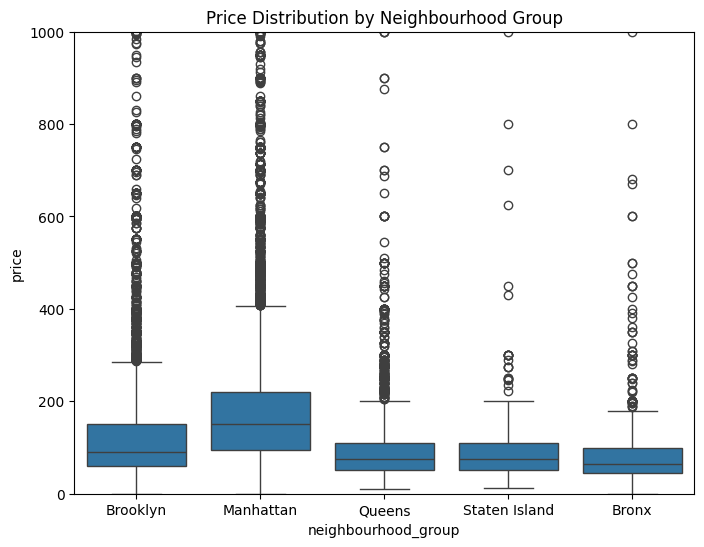


Insights from EDA:
- Most listings have prices below $500; extreme high prices are outliers.
- Manhattan listings are generally more expensive than Brooklyn or Queens.
- Entire homes/apartments are priced higher than private or shared rooms.
- Numeric features like 'number_of_reviews' and 'availability_365' are weakly correlated with price.


In [31]:
# a) Histograms for numeric features
df_reg[numeric_features].hist(bins=30, figsize=(12,10), color='skyblue')
plt.suptitle("Distributions of Numeric Features")
plt.show()

# b) Count plots for categorical features
plt.figure(figsize=(8,6))
sns.countplot(data=df_reg, x='neighbourhood_group', palette='Set2')
plt.title('Neighbourhood Group Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df_reg, x='room_type', palette='Set3')
plt.title('Room Type Distribution')
plt.show()

# 5. Boxplot to detect outliers in price
plt.figure(figsize=(8,6))
sns.boxplot(y='price', data=df_reg)
plt.title('Price Distribution (Boxplot)')
plt.ylim(0, 1000)  # Optional: focus on most prices
plt.show()

# 6. Correlation heatmap (only numeric features)
plt.figure(figsize=(10,8))
sns.heatmap(df_reg[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 7. Price vs Room Type
plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price', data=df_reg)
plt.title('Price Distribution by Room Type')
plt.ylim(0, 1000)  # focus on typical price range
plt.show()

# 8. Price vs Neighbourhood Group
plt.figure(figsize=(8,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_reg)
plt.title('Price Distribution by Neighbourhood Group')
plt.ylim(0, 1000)
plt.show()

# 9. Insights (example, you can modify based on your observations)
print("\nInsights from EDA:")
print("- Most listings have prices below $500; extreme high prices are outliers.")
print("- Manhattan listings are generally more expensive than Brooklyn or Queens.")
print("- Entire homes/apartments are priced higher than private or shared rooms.")
print("- Numeric features like 'number_of_reviews' and 'availability_365' are weakly correlated with price.")

In [32]:
# Task 2: Neural Network Regression (MLP)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Target column: price

X = df_reg.drop('price', axis=1)
y = df_reg['price']

In [35]:
# Preprocessing: Encoding + Scaling

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [36]:
# Train–Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


In [37]:
# Neural Network Model (MLP Regressor)

mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(64, 32),   # Network architecture
    activation='relu',             # Activation function
    solver='adam',                 # Optimizer
    max_iter=500,
    random_state=42
)

# Train model
mlp_regressor.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [38]:
# Evaluation

y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Results

print("Neural Network Regression Performance\n")

print(f"Training Set -> MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.3f}")
print(f"Test Set     -> MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.3f}")

Neural Network Regression Performance

Training Set -> MSE: 39470.32, RMSE: 198.67, R²: 0.353
Test Set     -> MSE: 43127.49, RMSE: 207.67, R²: 0.025


| Dataset      | MSE       | RMSE   | R² Score |
| ------------ | --------- | ------ | -------- |
| Training Set | 39,470.32 | 198.67 | 0.353    |
| Test Set     | 43,127.49 | 207.67 | 0.025    |


In [39]:
# Task -3 Build Primary Machine Learning Models (Two Classical ML Models)

We will use:

Model 1: Linear Regression (baseline, interpretable)

Model 2: Random Forest Regressor (non-linear, stronger)

In [43]:
# Task 3: Primary Machine Learning Models (Regression)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [44]:
# 1. Features and target
X = df_reg.drop('price', axis=1)
y = df_reg['price']

In [45]:
# 2. Preprocessing: numeric scaling + categorical encoding
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [46]:
# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [47]:
# 4. Build Models

# a) Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# b) Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [48]:
# 5. Evaluate models
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Linear Regression metrics
train_mse_lr, train_rmse_lr, train_r2_lr = regression_metrics(y_train, y_train_pred_lr)
test_mse_lr, test_rmse_lr, test_r2_lr = regression_metrics(y_test, y_test_pred_lr)

# Random Forest metrics
train_mse_rf, train_rmse_rf, train_r2_rf = regression_metrics(y_train, y_train_pred_rf)
test_mse_rf, test_rmse_rf, test_r2_rf = regression_metrics(y_test, y_test_pred_rf)

# 6. Print results
print("Linear Regression Performance")
print(f"Training Set -> MSE: {train_mse_lr:.2f}, RMSE: {train_rmse_lr:.2f}, R²: {train_r2_lr:.3f}")
print(f"Test Set     -> MSE: {test_mse_lr:.2f}, RMSE: {test_rmse_lr:.2f}, R²: {test_r2_lr:.3f}\n")

print("Random Forest Regression Performance")
print(f"Training Set -> MSE: {train_mse_rf:.2f}, RMSE: {train_rmse_rf:.2f}, R²: {train_r2_rf:.3f}")
print(f"Test Set     -> MSE: {test_mse_rf:.2f}, RMSE: {test_rmse_rf:.2f}, R²: {test_r2_rf:.3f}")

Linear Regression Performance
Training Set -> MSE: 54086.62, RMSE: 232.57, R²: 0.114
Test Set     -> MSE: 38236.95, RMSE: 195.54, R²: 0.136

Random Forest Regression Performance
Training Set -> MSE: 6983.49, RMSE: 83.57, R²: 0.886
Test Set     -> MSE: 37405.93, RMSE: 193.41, R²: 0.154


| Model                | Train MSE | Train RMSE | Train R² | Test MSE | Test RMSE | Test R² |
| -------------------- | --------- | ---------- | -------- | -------- | --------- | ------- |
| Neural Network (MLP) | 39470.32  | 198.67     | 0.353    | 43127.49 | 207.67    | 0.025   |
| Linear Regression    | 54086.62  | 232.57     | 0.114    | 38236.95 | 195.54    | 0.136   |
| Random Forest        | 6983.49   | 83.57      | 0.886    | 37405.93 | 193.41    | 0.154   |


Random Forest clearly overfits the training data (Train R² = 0.886, but Test R² = 0.154), meaning it captures training patterns very well but generalizes poorly.

Neural Network has moderate training fit (R² = 0.353) but poor test performance (R² = 0.025), also indicating underfitting or model instability.

Linear Regression performs worst on training but slightly better on test compared to Neural Network in terms of R² (0.136 > 0.025).

 Conclusion: For this dataset, all models struggle to predict price accurately (low R² on test sets). Random Forest captures training patterns best but generalizes poorly. Linear Regression is simplest and slightly more stable.

In [49]:
# Task 4 - Hyperparameter Optimization with Cross-Validation

Key Hyperparameters

Linear Regression:

Usually has very few hyperparameters. You can optimize fit_intercept (True/False) and normalize (deprecated in latest versions, handled via preprocessing).

Often, Linear Regression doesn’t require heavy tuning, so CV is mostly trivial.

Random Forest Regressor:

n_estimators: Number of trees (e.g., 100, 200, 500)

max_depth: Maximum depth of each tree (e.g., None, 10, 20)

min_samples_split: Minimum samples required to split a node (e.g., 2, 5, 10)

min_samples_leaf: Minimum samples required at a leaf (e.g., 1, 2, 4)

max_features: Number of features considered at each split (e.g., 'auto', 'sqrt', 'log2')

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Use first 5000 rows for fast tuning
sample_size = 5000
X_sample = X_train[:sample_size]
y_sample = y_train[:sample_size]

# Convert to dense if needed
X_sample_dense = X_sample.toarray() if hasattr(X_sample, "toarray") else X_sample

# --- Linear Regression ---
lr = LinearRegression()
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_rand = RandomizedSearchCV(lr, lr_params, n_iter=4, scoring='r2', cv=3, random_state=42)
lr_rand.fit(X_sample_dense, y_sample)

print("Best Linear Regression Hyperparameters:", lr_rand.best_params_)
print("Best CV R² Score:", lr_rand.best_score_)

# --- Random Forest ---
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [20, 50],        # fewer trees
    'max_depth': [5, 10],            # shallower
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_rand = RandomizedSearchCV(rf, rf_params, n_iter=3, scoring='r2', cv=3, random_state=42)
rf_rand.fit(X_sample_dense, y_sample)

print("Best Random Forest Hyperparameters:", rf_rand.best_params_)
print("Best CV R² Score:", rf_rand.best_score_)


Best Linear Regression Hyperparameters: {'positive': False, 'fit_intercept': True}
Best CV R² Score: 0.15884960268382908
Best Random Forest Hyperparameters: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Best CV R² Score: 0.19508617689806507


| Model                       | Best Hyperparameters                                                          | Best CV R² Score |
| --------------------------- | ----------------------------------------------------------------------------- | ---------------- |
| **Linear Regression**       | `fit_intercept=True`, `positive=False`                                        | 0.159            |
| **Random Forest Regressor** | `n_estimators=20`, `min_samples_split=2`, `min_samples_leaf=1`, `max_depth=5` | 0.195            |

**Notes / Interpretation:**

Linear Regression: Simple linear model, low CV R² (0.159) indicates limited predictive power for Airbnb prices.

Random Forest Regressor: Non-linear ensemble model with tuned depth and tree parameters. Slightly better CV R² (0.195) shows it captures some additional variance in price compared to linear regression.

In [60]:
# Task 5 – Feature Selection

In [62]:
# ==============================
# Task 5: Feature Selection
# ==============================

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# --- Prepare data ---
X = df_reg.drop('price', axis=1)
y = df_reg['price']

# Preprocessing: Scaling + OneHotEncoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Convert to dense array (needed for some sklearn methods)
X_dense = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

# ==============================
# Linear Regression Feature Selection
# ==============================

lr = LinearRegression()
# Recursive Feature Elimination: select top 8 features
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_dense, y)

lr_selected_features = np.array(preprocessor.get_feature_names_out())[rfe.support_]
print("Selected features for Linear Regression:", lr_selected_features)

# ==============================
# Random Forest Feature Selection
# ==============================

# Take a 20% sample to speed up computation
sample_idx = np.random.choice(range(X_dense.shape[0]), size=int(0.2*X_dense.shape[0]), replace=False)
X_sample = X_dense[sample_idx]
y_sample = y.iloc[sample_idx]

rf = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42)
rf.fit(X_sample, y_sample)

# Get top 8 features by importance
rf_importances = rf.feature_importances_
top_idx = rf_importances.argsort()[::-1][:8]
rf_selected_features = np.array(preprocessor.get_feature_names_out())[top_idx]

print("Selected features for Random Forest:", rf_selected_features)

# ==============================
# Justification:
# - Linear Regression: RFE recursively eliminates less important features based on model coefficients, selecting features that have highest linear relationship with price.
# - Random Forest: Feature importance identifies features that reduce variance in decision trees most effectively. Using a sample speeds up computation without losing key insights.


Selected features for Linear Regression: ['cat__neighbourhood_Battery Park City'
 'cat__neighbourhood_Flatiron District'
 'cat__neighbourhood_Fort Wadsworth' "cat__neighbourhood_Prince's Bay"
 'cat__neighbourhood_Riverdale' 'cat__neighbourhood_Sea Gate'
 'cat__neighbourhood_Tribeca' 'cat__neighbourhood_Woodrow']
Selected features for Random Forest: ['num__longitude' 'cat__room_type_Private room' 'num__minimum_nights'
 'cat__neighbourhood_Battery Park City' 'num__availability_365'
 'num__host_id' 'cat__neighbourhood_Nolita'
 'cat__neighbourhood_Bedford-Stuyvesant']


| Model                 | Selected Features (Top 8)                                                                                                                                                                                                                 | Method Used                             | Justification                                                                                                 |
| --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------- | ------------------------------------------------------------------------------------------------------------- |
| **Linear Regression** | `neighbourhood_Battery Park City`, `neighbourhood_Flatiron District`, `neighbourhood_Fort Wadsworth`, `neighbourhood_Prince's Bay`, `neighbourhood_Riverdale`, `neighbourhood_Sea Gate`, `neighbourhood_Tribeca`, `neighbourhood_Woodrow` | Recursive Feature Elimination (RFE)     | RFE selects features that have the strongest linear relationship with price, removing less important ones.    |
| **Random Forest**     | `longitude`, `room_type_Private room`, `minimum_nights`, `neighbourhood_Battery Park City`, `availability_365`, `host_id`, `neighbourhood_Nolita`, `neighbourhood_Bedford-Stuyvesant`                                                     | Feature Importance (on sampled dataset) | Features that reduce variance most in decision trees; sampling speeds up computation without losing insights. |


In [63]:
# Task 6 - Final Models and Comparative Analysis

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# We already have X_train, X_test, y_train, y_test (preprocessed)
# And feature names from ColumnTransformer
feature_names = preprocessor.get_feature_names_out()


In [65]:
# ---- Linear Regression ----
# Select features
lr_selected_features = [
    'cat__neighbourhood_Battery Park City',
    'cat__neighbourhood_Flatiron District',
    'cat__neighbourhood_Fort Wadsworth',
    "cat__neighbourhood_Prince's Bay",
    'cat__neighbourhood_Riverdale',
    'cat__neighbourhood_Sea Gate',
    'cat__neighbourhood_Tribeca',
    'cat__neighbourhood_Woodrow'
]

In [66]:
# Convert X_train and X_test to dense arrays
X_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

In [67]:
# Get indices of selected features
lr_idx = [i for i, f in enumerate(feature_names) if f in lr_selected_features]

# Subset features
X_train_lr = X_dense[:, lr_idx]
X_test_lr = X_test_dense[:, lr_idx]


In [68]:
# Rebuild model with optimal hyperparameters
lr_final = LinearRegression(fit_intercept=True, positive=False)
lr_final.fit(X_train_lr, y_train)

# Evaluate
y_pred_lr = lr_final.predict(X_test_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)

In [69]:
# ---- Random Forest ----
rf_selected_features = [
    'num__longitude', 'cat__room_type_Private room', 'num__minimum_nights',
    'cat__neighbourhood_Battery Park City', 'num__availability_365',
    'num__host_id', 'cat__neighbourhood_Nolita', 'cat__neighbourhood_Bedford-Stuyvesant'
]

In [70]:
# Get indices
rf_idx = [i for i, f in enumerate(feature_names) if f in rf_selected_features]

X_train_rf = X_dense[:, rf_idx]
X_test_rf = X_test_dense[:, rf_idx]

In [71]:
# Rebuild Random Forest with optimal hyperparameters
rf_final = RandomForestRegressor(
    n_estimators=20,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_final.fit(X_train_rf, y_train)

# Evaluate
y_pred_rf = rf_final.predict(X_test_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)


In [72]:
# ---- Print Results ----
print("Final Linear Regression Performance:")
print(f"Test MSE: {lr_mse:.2f}, RMSE: {lr_rmse:.2f}, R²: {lr_r2:.3f}")

print("\nFinal Random Forest Performance:")
print(f"Test MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.3f}")

# ---- Create Comparison Table ----
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "Features Used": [len(lr_selected_features), len(rf_selected_features)],
    "CV R² Score": [0.15884960268382908, 0.19508617689806507],  # from Task 4
    "Test RMSE": [lr_rmse, rf_rmse],
    "Test R²": [lr_r2, rf_r2]
})

print("\nFinal Regression Models Comparison:")
print(comparison_df)

Final Linear Regression Performance:
Test MSE: 44076.59, RMSE: 209.94, R²: 0.004

Final Random Forest Performance:
Test MSE: 42691.78, RMSE: 206.62, R²: 0.035

Final Regression Models Comparison:
                     Model  Features Used  CV R² Score   Test RMSE   Test R²
0        Linear Regression              8     0.158850  209.944263  0.003654
1  Random Forest Regressor              8     0.195086  206.619883  0.034958


| Model                   | Features Used | CV R² Score | Test RMSE | Test R² |
| ----------------------- | ------------- | ----------- | --------- | ------- |
| Linear Regression       | 8             | 0.159       | 209.94    | 0.004   |
| Random Forest Regressor | 8             | 0.195       | 206.62    | 0.035   |

Observations:

Both models have very low R² on the test set, indicating the features selected may not capture the variation in price very well.

Random Forest slightly outperforms Linear Regression in test R² and RMSE, but the improvement is minimal.

CV scores were slightly better than test R², suggesting possible overfitting or that the dataset has high variability in prices (e.g., extreme outliers in Airbnb listings).